In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path ="C:\\Users\\agaje\\Desktop\\EDA\\athletes.csv" # Path to your uploaded file
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
numerical=df.select_dtypes(include=['int64','float64']).columns #df.select used to select 
print("numerical features are",numerical.tolist())
categor=df.select_dtypes(include=['category','object','bool']).columns  
print("categorical features are",categor.tolist())

numerical features are ['code', 'height', 'weight']
categorical features are ['name', 'name_short', 'name_tv', 'gender', 'function', 'country_code', 'country', 'country_long', 'nationality', 'nationality_full', 'nationality_code', 'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country', 'residence_place', 'residence_country', 'nickname', 'hobbies', 'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero', 'influence', 'philosophy', 'sporting_relatives', 'ritual', 'other_sports']


In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Find rows where 'gender' column has missing values
missing_gender_rows = df[df['gender'].isna()]

# Display the rows with missing 'gender' values
print(missing_gender_rows)

Empty DataFrame
Columns: [code, name, name_short, name_tv, gender, function, country_code, country, country_long, nationality, nationality_full, nationality_code, height, weight, disciplines, events, birth_date, birth_place, birth_country, residence_place, residence_country, nickname, hobbies, occupation, education, family, lang, coach, reason, hero, influence, philosophy, sporting_relatives, ritual, other_sports]
Index: []

[0 rows x 35 columns]


In [6]:
# Calculate the gender ratio for each country, event, and sport

# Group by country, event, and discipline (sport) to get counts of male and female athletes
gender_counts = df.groupby(['country', 'disciplines', 'gender']).size().unstack(fill_value=0)

# Calculate the ratio of male to female athletes for each combination
gender_counts['Male_to_Female_Ratio'] = gender_counts['Male'] / gender_counts['Female']

# Display the result
gender_counts[['Male', 'Female', 'Male_to_Female_Ratio']].sort_values(by='Male_to_Female_Ratio', ascending=False).head()


gender                        Male  Female  Male_to_Female_Ratio
country    disciplines                                          
Czechia    ['Weightlifting']     1       0                   inf
San Marino ['Wrestling']         1       0                   inf
Colombia   ['Diving']            3       0                   inf
           ['Equestrian']        1       0                   inf
           ['Fencing']           1       0                   inf

In [7]:
# Let's calculate participation in events by gender to see if one gender dominates in certain sports/events.

# Group by event (disciplines) and gender, and count the number of athletes
event_gender_counts = df.groupby(['disciplines', 'gender']).size().unstack(fill_value=0)

# Calculate the total participants for each event and the percentage for each gender
event_gender_counts['Total_Participants'] = event_gender_counts['Male'] + event_gender_counts['Female']
event_gender_counts['Male_Percentage'] = (event_gender_counts['Male'] / event_gender_counts['Total_Participants']) * 100
event_gender_counts['Female_Percentage'] = (event_gender_counts['Female'] / event_gender_counts['Total_Participants']) * 100

# Display the events where one gender dominates (let's define dominance as > 70% participation)
dominant_gender_events = event_gender_counts[
    (event_gender_counts['Male_Percentage'] > 70) | (event_gender_counts['Female_Percentage'] > 70)
]

# Sort the results to see the most dominant gender in events
dominant_gender_events[['Male', 'Female', 'Male_Percentage', 'Female_Percentage']].sort_values(by='Male_Percentage', ascending=False).head()



gender,Male,Female,Male_Percentage,Female_Percentage
disciplines,,,,
"['Marathon Swimming', 'Swimming']",13,4,76.470588,23.529412
"['Cycling Road', 'Cycling Track']",3,8,27.272727,72.727273
"['3x3 Basketball', 'Basketball']",0,1,0.000000,100.000000
['Artistic Swimming'],0,106,0.000000,100.000000
"['Cycling Road', 'Triathlon']",0,1,0.000000,100.000000


C:\Users\agaje\AppData\Local\Temp\ipykernel_16520\840866950.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')


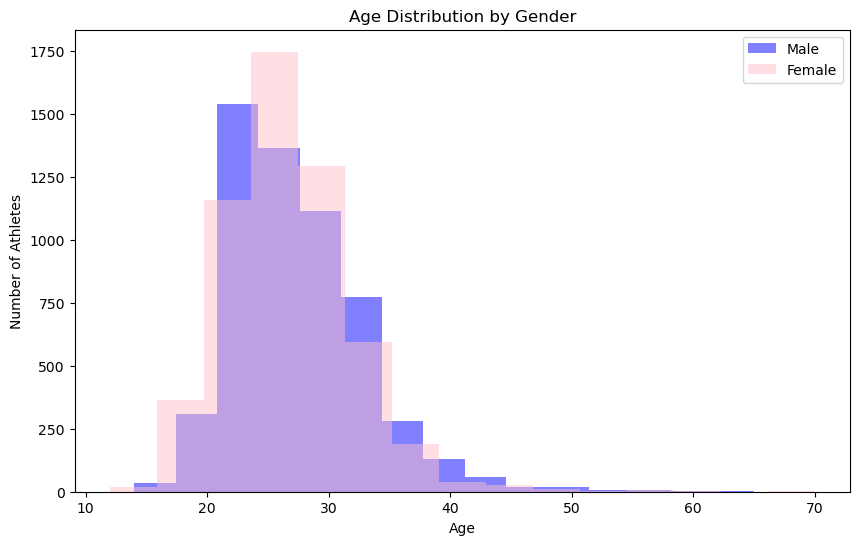

In [8]:
import matplotlib.pyplot as plt
import datetime as dt

# Convert 'birth_date' to datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Calculate the current year
current_year = dt.datetime.now().year

# Calculate the age of the athletes
df['age'] = current_year - df['birth_date'].dt.year

# Remove rows with missing or invalid age values
df = df[df['age'].notna()]

# Plot the age distribution for male and female athletes
plt.figure(figsize=(10, 6))
df[df['gender'] == 'Male']['age'].plot(kind='hist', alpha=0.5, label='Male', bins=15, color='blue')
df[df['gender'] == 'Female']['age'].plot(kind='hist', alpha=0.5, label='Female', bins=15, color='pink')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.title('Age Distribution by Gender')
plt.legend()

# Show the plot
plt.show()


In [28]:
# Count of male and female athletes by country
country_gender_counts = df.groupby(['country', 'gender']).size().unstack(fill_value=0)

# Calculate total athletes and gender percentage
country_gender_counts['Total'] = country_gender_counts['Male'] + country_gender_counts['Female']
country_gender_counts['Male_Percentage'] = (country_gender_counts['Male'] / country_gender_counts['Total']) * 100
country_gender_counts['Female_Percentage'] = (country_gender_counts['Female'] / country_gender_counts['Total']) * 100

# Display the first few rows
print(country_gender_counts.head(20))


gender               Female  Male  Total  Male_Percentage  Female_Percentage
country                                                                     
AIN                      17    15     32        46.875000          53.125000
Afghanistan               3     3      6        50.000000          50.000000
Albania                   3     5      8        62.500000          37.500000
Algeria                  19    27     46        58.695652          41.304348
American Samoa            1     1      2        50.000000          50.000000
Andorra                   1     1      2        50.000000          50.000000
Angola                   17     8     25        32.000000          68.000000
Antigua and Barbuda       2     3      5        60.000000          40.000000
Argentina                33   110    143        76.923077          23.076923
Armenia                   2    13     15        86.666667          13.333333
Aruba                     2     4      6        66.666667          33.333333

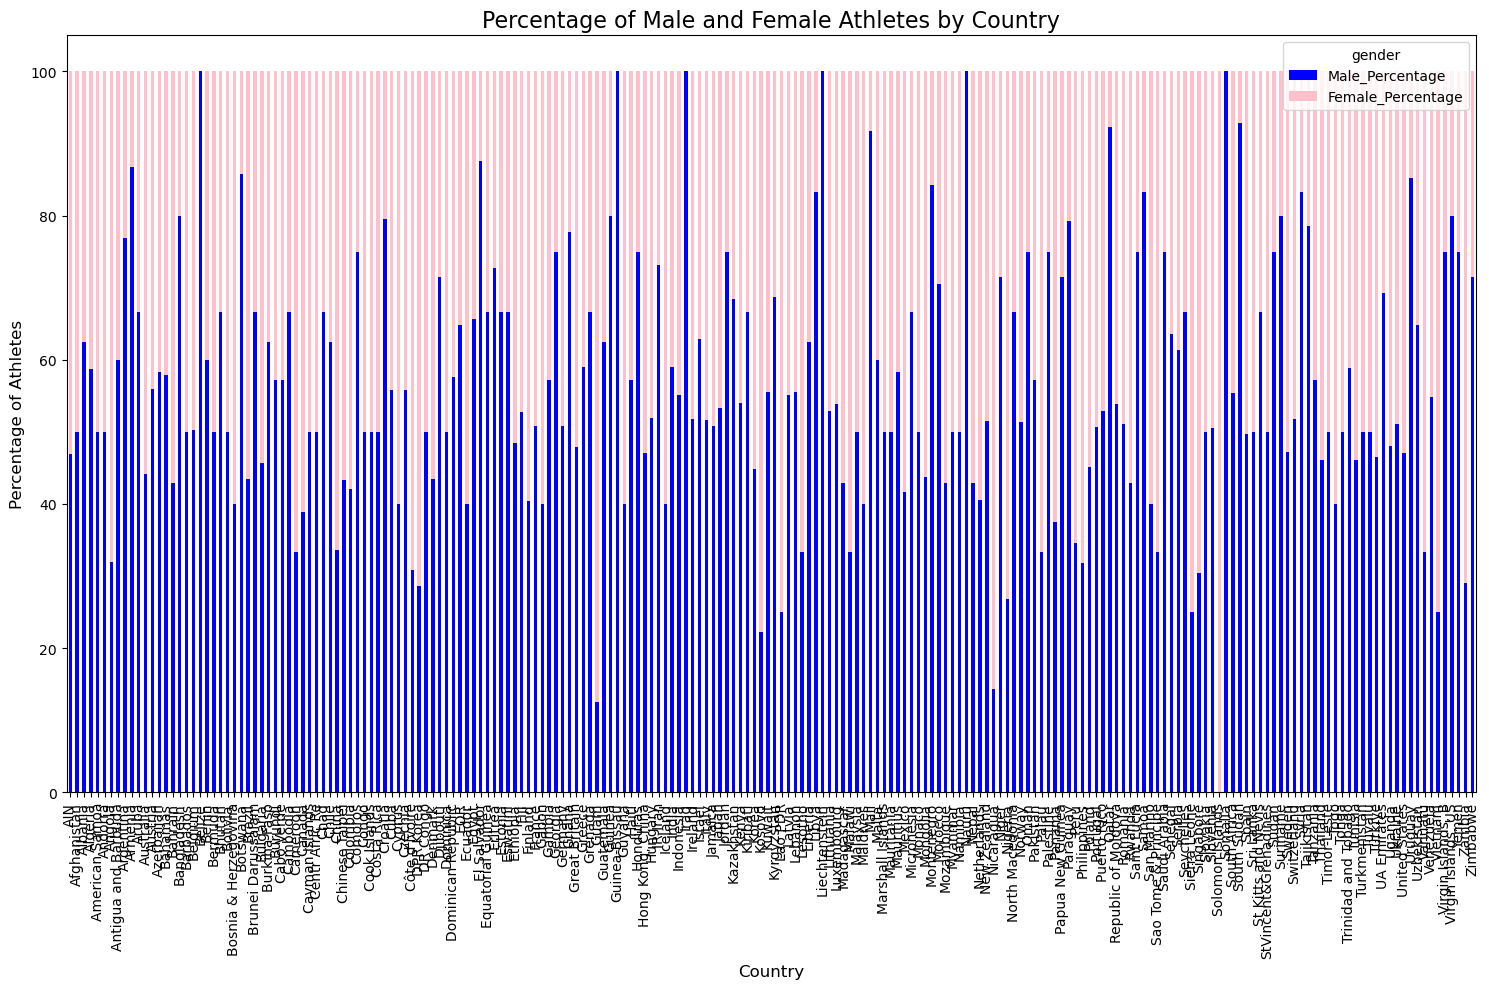

In [30]:
# Stacked bar chart for male and female percentages by country
country_gender_counts[['Male_Percentage', 'Female_Percentage']].plot(kind='bar', stacked=True, figsize=(15, 10), color=['blue', 'pink'])

# Title and labels
plt.title('Percentage of Male and Female Athletes by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Athletes', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
# Calculate the average age of male and female athletes
average_age_by_gender = df.groupby('gender')['age'].mean()

# Display the results
print(average_age_by_gender)


gender
Female    26.600183
Male      27.321132
Name: age, dtype: float64


In [14]:
# Count the number of male and female athletes in each sport (discipline)
sport_gender_counts = df.groupby(['disciplines', 'gender']).size().unstack(fill_value=0)

# Calculate the total participants and percentage for each gender
sport_gender_counts['Total_Participants'] = sport_gender_counts['Male'] + sport_gender_counts['Female']
sport_gender_counts['Male_Percentage'] = (sport_gender_counts['Male'] / sport_gender_counts['Total_Participants']) * 100
sport_gender_counts['Female_Percentage'] = (sport_gender_counts['Female'] / sport_gender_counts['Total_Participants']) * 100

# Display the sports with significant gender disparity
print(sport_gender_counts.head())


gender                            Female  Male  Total_Participants  \
disciplines                                                          
['3x3 Basketball', 'Basketball']       1     0                   1   
['3x3 Basketball']                    32    32                  64   
['Archery']                           64    64                 128   
['Artistic Gymnastics']               94    96                 190   
['Artistic Swimming']                106     0                 106   

gender                            Male_Percentage  Female_Percentage  
disciplines                                                           
['3x3 Basketball', 'Basketball']         0.000000         100.000000  
['3x3 Basketball']                      50.000000          50.000000  
['Archery']                             50.000000          50.000000  
['Artistic Gymnastics']                 50.526316          49.473684  
['Artistic Swimming']                    0.000000         100.000000  


In [24]:
# Calculate the average height and weight by gender
height_weight_by_gender = df.groupby('gender')[['height', 'weight']].mean()

# Display the results
print(height_weight_by_gender)


           height    weight
gender                     
Female  78.077360  1.940129
Male    85.388683  2.480255


In [18]:
# Re-importing the necessary libraries after the file re-upload
import pandas as pd

# Reloading the newly uploaded file to continue the analysis
athletes_df = pd.read_csv(file_path)

# Count the frequency of disciplines and events
discipline_counts = athletes_df['disciplines'].value_counts()
event_counts = athletes_df['events'].value_counts()

# Display the top 10 most common disciplines and events
top_disciplines = discipline_counts.head(10)
top_events = event_counts.head(10)

top_disciplines, top_events


(disciplines
 ['Athletics']       2018
 ['Swimming']         836
 ['Football']         553
 ['Rowing']           493
 ['Hockey']           415
 ['Handball']         386
 ['Judo']             378
 ['Shooting']         342
 ['Sailing']          330
 ['Rugby Sevens']     317
 Name: count, dtype: int64,
 events
 ['Men']                   1478
 ['Women']                 1385
 ["Men's Individual"]       103
 ["Women's Individual"]     102
 ["Men's Singles"]           94
 ["Women's Singles"]         94
 ["Women's Marathon"]        90
 ["Men's Marathon"]          82
 ['Group All-Around']        70
 ["Men's 100m"]              66
 Name: count, dtype: int64)

C:\Users\agaje\AppData\Local\Temp\ipykernel_16520\3366402732.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discipline_counts.values, y=discipline_counts.index, ax=axs[0], palette="Blues_d")
C:\Users\agaje\AppData\Local\Temp\ipykernel_16520\3366402732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.values, y=event_counts.index, ax=axs[1], palette="Greens_d")


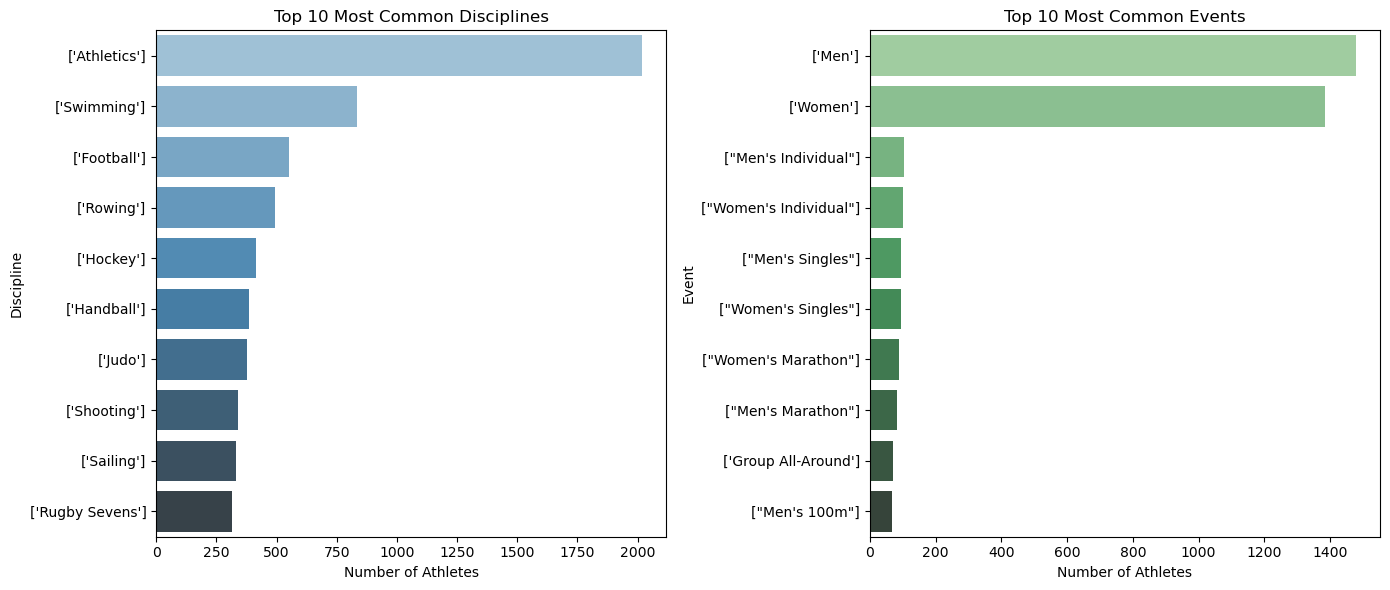

In [22]:
# Re-running the same code for visualizing the most common disciplines and events
discipline_counts = df['disciplines'].value_counts().head(10)
event_counts = df['events'].value_counts().head(10)

# Set up the figure and axis for the plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for disciplines
sns.barplot(x=discipline_counts.values, y=discipline_counts.index, ax=axs[0], palette="Blues_d")
axs[0].set_title('Top 10 Most Common Disciplines')
axs[0].set_xlabel('Number of Athletes')
axs[0].set_ylabel('Discipline')

# Plot for events
sns.barplot(x=event_counts.values, y=event_counts.index, ax=axs[1], palette="Greens_d")
axs[1].set_title('Top 10 Most Common Events')
axs[1].set_xlabel('Number of Athletes')
axs[1].set_ylabel('Event')

# Improve layout and display the plots
plt.tight_layout()
plt.show()


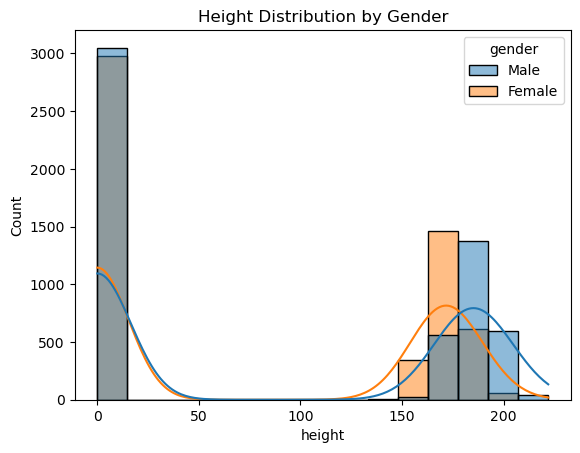

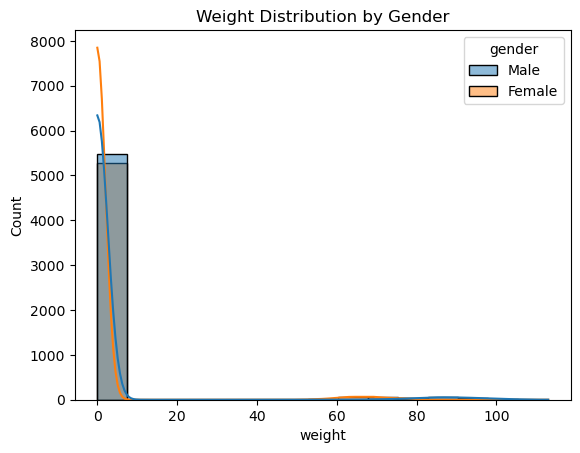

In [32]:
import seaborn as sns
sns.histplot(data=df, x='height', hue='gender', kde=True)
plt.title('Height Distribution by Gender')
plt.show()

sns.histplot(data=df, x='weight', hue='gender', kde=True)
plt.title('Weight Distribution by Gender')
plt.show()


In [38]:
top_countries = df['country'].value_counts().head(20)
print("Top 5 Countries with the Highest Athlete Participation:")
print(top_countries)


Top 5 Countries with the Highest Athlete Participation:
country
United States    619
France           600
Australia        475
Germany          457
Japan            431
Spain            401
China            398
Italy            397
Great Britain    342
Canada           332
Brazil           290
Netherlands      289
Poland           226
New Zealand      208
Hungary          177
Belgium          177
Egypt            157
Korea            147
Argentina        143
Ireland          143
Name: count, dtype: int64


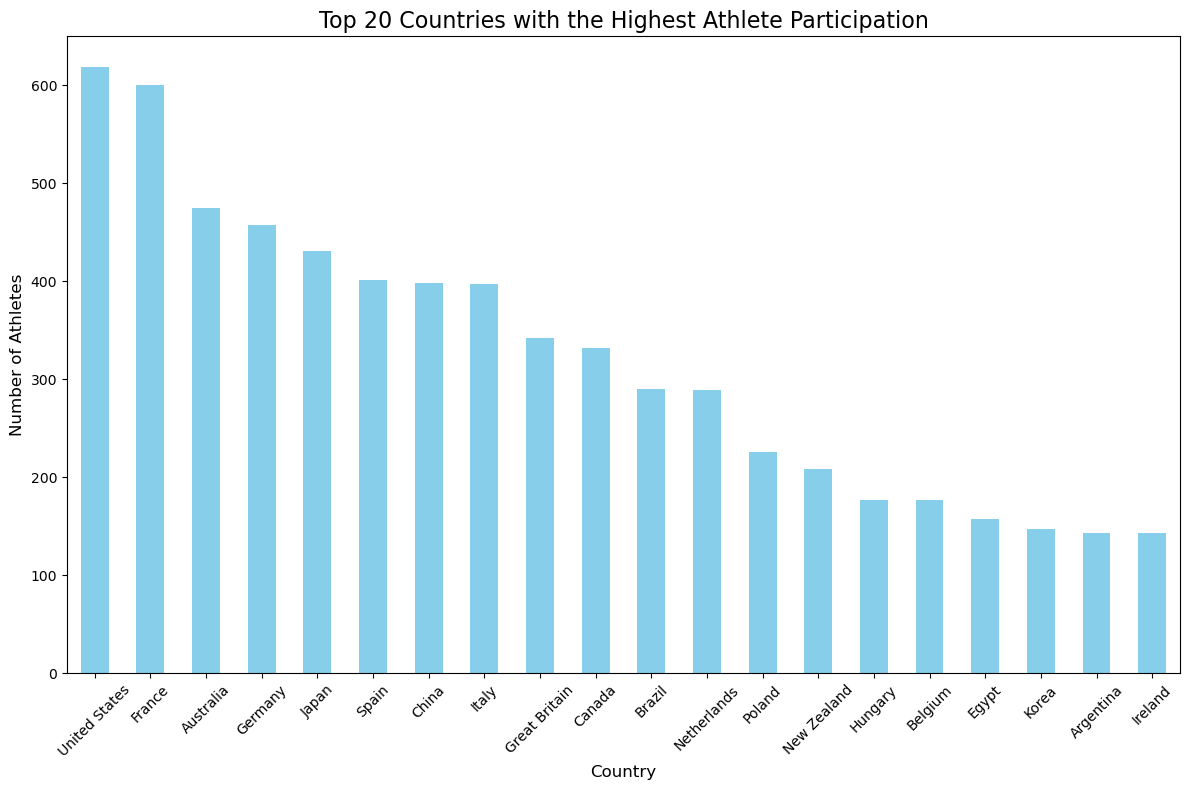

In [40]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(12, 8))

# Bar chart for top 20 countries with the highest athlete participation
top_countries.plot(kind='bar', color='skyblue')

# Title and labels
plt.title('Top 20 Countries with the Highest Athlete Participation', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [42]:
country_with_highest_female_percentage = country_gender_counts['Female_Percentage'].idxmax()
highest_female_percentage = country_gender_counts['Female_Percentage'].max()
print(f"Country with Highest Female Participation: {country_with_highest_female_percentage} ({highest_female_percentage:.2f}%)")


Country with Highest Female Participation: Solomon Islands (100.00%)


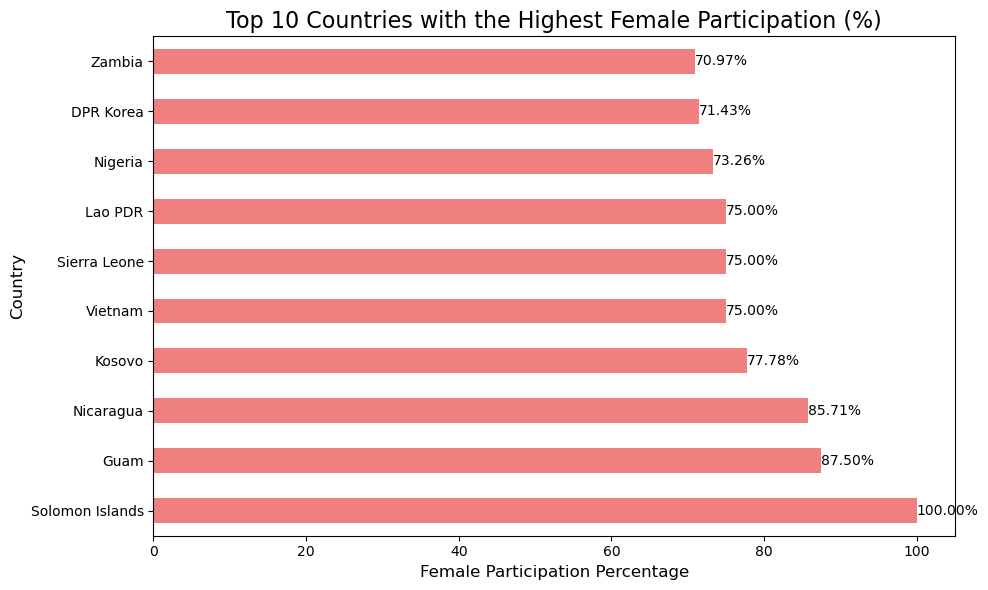

In [44]:
import matplotlib.pyplot as plt

# Sort countries by female participation percentage
top_female_percentage_countries = country_gender_counts.sort_values(by='Female_Percentage', ascending=False).head(10)

# Plot settings
plt.figure(figsize=(10, 6))

# Horizontal bar chart for top countries with highest female participation
top_female_percentage_countries['Female_Percentage'].plot(kind='barh', color='lightcoral')

# Title and labels
plt.title('Top 10 Countries with the Highest Female Participation (%)', fontsize=16)
plt.xlabel('Female Participation Percentage', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Display the percentage values on the bars
for index, value in enumerate(top_female_percentage_countries['Female_Percentage']):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Display the plot
plt.tight_layout()
plt.show()
